In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV


In [10]:
# Read in connectomes
train_connectome = pd.read_csv('/Users/rubyc/Desktop/Datathon/WIDS_Datathon2025_Team/Archive/widsdatathon2025/TRAIN_NEW/TRAIN_FUNCTIONAL_CONNECTOME_MATRICES_new_36P_Pearson.csv')

# Read in one-hot encoded and imputated data 
train_survey = pd.read_csv('/Users/rubyc/Desktop/Datathon/WIDS_Datathon2025_Team/Archive/Preprocessing/train_cat_quant_imputed.csv')

# Read in Solutions 
solutions = pd.read_excel('/Users/rubyc/Desktop/Datathon/WIDS_Datathon2025_Team/Archive/widsdatathon2025/TRAIN_NEW/TRAINING_SOLUTIONS.xlsx')

In [11]:
# Merge 
train_merged = train_survey.merge(train_connectome, on='participant_id', how='left')
train_merged = train_merged.set_index('participant_id')

solutions = solutions.set_index('participant_id')

solutions['outcome'] = np.select(
    [
        (solutions['ADHD_Outcome'] == 1) & (solutions['Sex_F'] == 1),  # ADHD and female
        (solutions['ADHD_Outcome'] == 0) & (solutions['Sex_F'] == 1),  # No ADHD and female
        (solutions['ADHD_Outcome'] == 1) & (solutions['Sex_F'] == 0),  # ADHD and male
        (solutions['ADHD_Outcome'] == 0) & (solutions['Sex_F'] == 0),  # No ADHD and male
    ],
    ['adhd_f', 'noadhd_f', 'adhd_m', 'noadhd_m'], 
    default=np.nan  
)


In [12]:
solutions.head()

,ADHD_Outcome,Sex_F,outcome
participant_id,,,
UmrK0vMLopoR,1,1,adhd_f
CPaeQkhcjg7d,1,0,adhd_m
Nb4EetVPm3gs,1,0,adhd_m
p4vPhVu91o4b,1,1,adhd_f
M09PXs7arQ5E,1,1,adhd_f


In [13]:
train_merged

,Barratt_Barratt_P1_Edu_college_edu,Barratt_Barratt_P1_Edu_graduate_edu,Barratt_Barratt_P1_Edu_high_school_grad,Barratt_Barratt_P1_Edu_junior_middle_school,Barratt_Barratt_P1_Edu_less_than_7th,Barratt_Barratt_P1_Edu_partial_college,Barratt_Barratt_P1_Edu_partial_high_school,Barratt_Barratt_P1_Edu_unknown,Barratt_Barratt_P1_Occ_0.0,Barratt_Barratt_P1_Occ_1.0,...,195throw_196thcolumn,195throw_197thcolumn,195throw_198thcolumn,195throw_199thcolumn,196throw_197thcolumn,196throw_198thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn
participant_id,,,,,,,,,,,,,,,,,,,,,
00aIpNTbG5uh,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.047477,-0.096450,-0.280312,0.037560,0.423037,0.242453,0.336213,0.402338,0.327915,0.539032
00fV0OyyoLfw,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,-0.143218,-0.276464,-0.332783,-0.332711,0.556939,0.475578,0.429196,0.457970,0.312571,0.595978
04X1eiS79T4B,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,-0.133778,-0.108588,-0.002132,-0.175586,0.679183,0.290292,0.486680,0.255208,0.575017,0.605182
05ocQutkURd6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.096647,-0.041420,-0.199576,-0.216457,0.519074,0.298586,0.415466,0.511607,0.361204,0.446613
06YUNBA9ZRLq,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,-0.158995,-0.274017,-0.141012,-0.002865,0.515169,0.336139,0.316430,0.442230,0.177079,0.378278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zwjJWCRzKhDz,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.157897,0.122978,0.112789,0.211312,0.601190,0.587116,0.312695,0.485938,0.189102,0.354333
zwXD5v17Rx01,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.343204,0.198827,0.253990,0.198741,0.648260,0.055241,0.491985,0.118676,0.404331,0.537121
zWzLCi3NTBTd,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.110834,-0.002346,0.044653,0.234887,0.538475,0.024265,0.472322,0.095624,0.205326,0.182633


In [5]:
train_merged.isna().sum().sum()

0

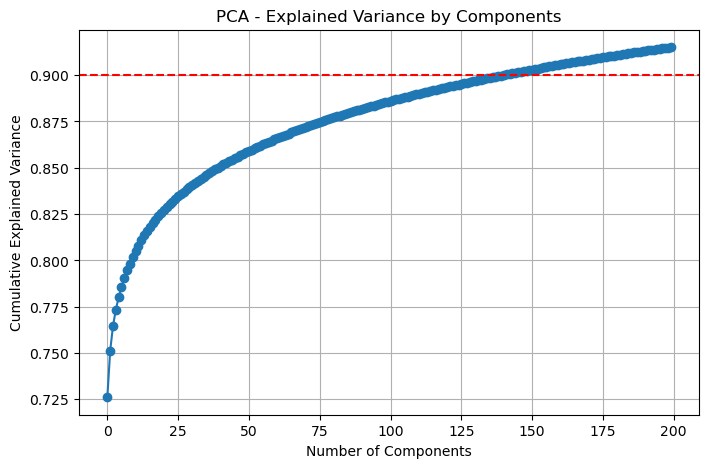

In [20]:
X = train_merged
y = solutions["outcome"].values.ravel()

pca = PCA(n_components=200)

X_pca=pca.fit_transform(X)

# Step 2: Cumulative variance
cumulative_variance = pca.explained_variance_ratio_.cumsum()

# Step 3: Plot
plt.figure(figsize=(8,5))
plt.plot(cumulative_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Explained Variance by Components')
plt.grid(True)
plt.axhline(y=0.90, color='r', linestyle='--')  
plt.show()

In [21]:
n_components_90 = np.argmax(cumulative_variance >= 0.90) + 1
print(f"Number of components to retain 90% variance: {n_components_90}")


Number of components to retain 90% variance: 141


In [22]:
# Split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Then apply PCA on X_train
pca = PCA(n_components=141)
X_train_pca = pca.fit_transform(X_train)

In [23]:
# Train LDA as classifier
lda = LDA()
lda.fit(X_train_pca, y_train)

# Transform X_test using the same PCA
X_test_pca = pca.transform(X_test)

# Predict
y_pred = lda.predict(X_test_pca)

# Accuracy
print("LDA Classifier Accuracy:", accuracy_score(y_test, y_pred))


LDA Classifier Accuracy: 0.4567901234567901


In [24]:
param_grid = [
    {'solver': ['svd']},  # No shrinkage allowed
    {'solver': ['lsqr', 'eigen'], 'shrinkage': [None, 'auto']}
]

lda = LDA()
grid_search = GridSearchCV(lda, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_pca, y_train)

print("Best Params:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)


Best Params: {'shrinkage': 'auto', 'solver': 'lsqr'}
Best Accuracy: 0.3752577319587629


## Using autoencoded data

In [25]:
encoded_data = pd.read_csv('/Users/rubyc/Desktop/Datathon/WIDS_Datathon2025_Team/Archive/Preprocessing/merged_ae_encoded_cat_quant.csv', index_col=0)

In [26]:
encoded_data = encoded_data.set_index('participant_id')

In [27]:
encoded_data

,latent_0,latent_1,latent_2,latent_3,latent_4,latent_5,latent_6,latent_7,latent_8,latent_9,...,latent_120,latent_121,latent_122,latent_123,latent_124,latent_125,latent_126,latent_127,ADHD_Outcome,Sex_F
participant_id,,,,,,,,,,,,,,,,,,,,,
70z8Q2xdTXM3,-0.062868,0.349555,0.269102,-1.037250,-0.371457,2.687041,-0.938559,0.343819,1.529028,0.248054,...,-2.800898,2.112763,0.072746,0.112833,1.101317,-0.274609,1.780691,-1.200128,1,0
WHWymJu6zNZi,0.873152,-1.348689,-0.075249,1.310259,0.850240,1.172884,0.660620,-0.151064,-0.515864,-0.286208,...,-4.479689,1.553875,-0.383005,-0.554659,-0.591001,0.558051,-0.607866,-0.977393,1,1
4PAQp1M6EyAo,-0.687261,-1.126725,0.717308,-0.064086,0.543015,1.060938,1.972849,-2.691068,-1.914502,1.330024,...,-4.895132,1.453139,0.981051,-2.081374,-1.202411,1.856776,-0.835133,-0.634262,1,1
obEacy4Of68I,-1.045028,-1.901052,-0.776158,1.970023,-0.871627,2.879390,1.910207,-0.794189,0.619428,-1.270346,...,-1.757071,-0.234614,-1.012772,-1.371495,1.433907,1.109286,-1.380279,0.399602,1,1
s7WzzDcmDOhF,-1.022789,-0.238109,1.401311,0.484008,0.408498,3.093665,2.066896,-2.035163,-1.798792,1.126087,...,-3.318735,0.657356,-1.185613,-1.802620,-0.060335,0.008029,-1.619095,0.382254,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9gpepMI9sj5q,2.014468,-0.176188,1.629271,1.213633,3.268481,-0.598442,1.546671,0.019859,-1.692979,0.643602,...,-5.634956,3.179805,2.426088,-1.299495,-3.756280,0.740891,-0.990850,-2.704750,0,1
FIDen5rdMc0v,-0.373910,-0.945040,-0.279460,-0.856996,-0.001685,1.560923,0.389681,-0.680614,0.740493,0.481791,...,-4.127653,0.368070,-0.467843,-0.200434,-0.181398,-0.081095,-0.312769,-1.662183,1,0
dlsMC4TXL4e8,-0.192558,1.388893,1.707303,-0.946412,0.264569,2.533679,-0.474405,0.026999,-0.005556,1.386748,...,-3.184949,3.036472,1.153585,-0.193754,0.396788,-0.868862,1.245329,-2.188569,1,0


In [28]:
encoded_data['outcome'] = np.select(
    [
        (solutions['ADHD_Outcome'] == 1) & (solutions['Sex_F'] == 1),  # ADHD and female
        (solutions['ADHD_Outcome'] == 0) & (solutions['Sex_F'] == 1),  # No ADHD and female
        (solutions['ADHD_Outcome'] == 1) & (solutions['Sex_F'] == 0),  # ADHD and male
        (solutions['ADHD_Outcome'] == 0) & (solutions['Sex_F'] == 0),  # No ADHD and male
    ],
    ['adhd_f', 'noadhd_f', 'adhd_m', 'noadhd_m'], 
    default=np.nan  
)

In [29]:
X = encoded_data.drop(columns=['ADHD_Outcome', 'Sex_F', 'outcome'])
y= encoded_data['outcome']


In [30]:
# Split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train LDA as classifier
lda = LDA()
lda.fit(X_train, y_train)

# Predict
y_pred = lda.predict(X_test)

# Accuracy
print("LDA Classifier Accuracy:", accuracy_score(y_test, y_pred))

LDA Classifier Accuracy: 0.5473251028806584


In [31]:
param_grid = [
    {'solver': ['svd']},  # No shrinkage allowed
    {'solver': ['lsqr', 'eigen'], 'shrinkage': [None, 'auto']}
]

lda = LDA()
grid_search = GridSearchCV(lda, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Params:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Best Params: {'solver': 'svd'}
Best Accuracy: 0.46288659793814435


# Using GNN encoded data 

In [32]:
encoded_data = pd.read_csv('/Users/rubyc/Desktop/Datathon/WIDS_Datathon2025_Team/Archive/Preprocessing/merged_gnn_encoded_cat_quant.csv', index_col=0)
encoded_data = encoded_data.set_index('participant_id')

In [33]:
encoded_data['outcome'] = np.select(
    [
        (solutions['ADHD_Outcome'] == 1) & (solutions['Sex_F'] == 1),  # ADHD and female
        (solutions['ADHD_Outcome'] == 0) & (solutions['Sex_F'] == 1),  # No ADHD and female
        (solutions['ADHD_Outcome'] == 1) & (solutions['Sex_F'] == 0),  # ADHD and male
        (solutions['ADHD_Outcome'] == 0) & (solutions['Sex_F'] == 0),  # No ADHD and male
    ],
    ['adhd_f', 'noadhd_f', 'adhd_m', 'noadhd_m'], 
    default=np.nan  
)

In [34]:
X = encoded_data.drop(columns=['ADHD_Outcome', 'Sex_F', 'outcome'])
y= encoded_data['outcome']

In [35]:
# Split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train LDA as classifier
lda = LDA()
lda.fit(X_train, y_train)

# Predict
y_pred = lda.predict(X_test)

# Accuracy
print("LDA Classifier Accuracy:", accuracy_score(y_test, y_pred))

LDA Classifier Accuracy: 0.4444444444444444


In [ ]:
param_grid = [
    {'solver': ['svd']},  # No shrinkage allowed
    {'solver': ['lsqr', 'eigen'], 'shrinkage': [None, 'auto']}
]

lda = LDA()
grid_search = GridSearchCV(lda, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Params:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)